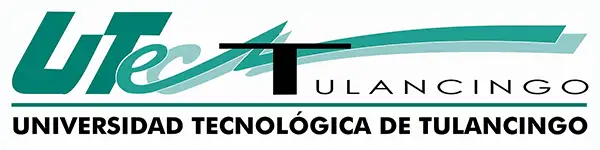

INGENIERÍA EN DESARROLLO Y GESTIÓN DE SOFTWARE

MATERIA: EXTRACCIÓN DE CONOCIMIENTOS DE BASE DE DATOS

NOMBRE DEL ALUMNO: VICTOR ALDAIR MARTINEZ GAYOSSO

NOMBRE DEL DOCENTE: SALVADOR HERNÁNDEZ MENDOZA

4.2 METRICAS DE EVALUACIÓN (TITANIC)

CUATRIMESTRE: 9º

GRUPO: IDGS-91

FECHA: 04 DE DICIEMBRE DE 2021

# Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 9

# Importar el dataset

In [ ]:
dataframe = pd.read_csv('titanic.csv')

# Analizar el dataframne

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [ ]:
dataframe.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
dataframe.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Crear una columna (Feature Ingenering)

In [ ]:
dataframe['Male'] = dataframe['Sex'] == 'male'

In [ ]:
dataframe.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


# Scatter plot

Text(0, 0.5, 'Age')

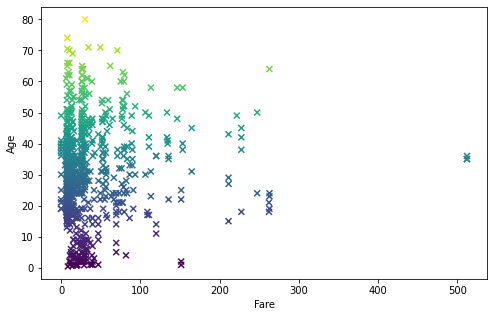

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(dataframe['Fare'], dataframe['Age'],c=dataframe['Age'],marker="x")
plt.xlabel('Fare')
plt.ylabel('Age') 

# Separar caracteriticas y objetivo

In [ ]:
X = dataframe[['Pclass','Age','Siblings/Spouses','Parents/Children','Fare','Male']].values
y = dataframe['Survived'].values

In [ ]:
X

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 7.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

# Configurar el modelo

In [ ]:
model = LogisticRegression()


# Dividir el train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=124)

# Entrenamineto 

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

# Predicciones

In [ ]:
y_pred = model.predict(X_test)

# Analizar las predicciones

In [ ]:
X_test.shape

(178, 6)

In [ ]:
X_test[:]

array([[3, 4.0, 4, 1, 29.125, True],
       [3, 21.0, 0, 0, 7.925, True],
       [1, 45.0, 0, 0, 26.55, True],
       ...,
       [2, 28.0, 0, 0, 13.5, True],
       [3, 16.0, 0, 0, 7.7333, False],
       [2, 50.0, 0, 0, 10.5, False]], dtype=object)

In [ ]:
y_test[:]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1])

In [ ]:
y_pred[:]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1])

# Probabilidad

In [ ]:
model.predict_proba(X_test)[6,0]

0.43512149983433746

In [ ]:
model.predict_proba(X_test)[6,1]

0.5648785001656625

In [ ]:
y.shape

(887,)

In [ ]:
y.sum() # Sobrevivieron

342

In [ ]:
y.shape - y.sum() # No sobrevivieron

array([545])

99.9% datos son correos validos

0.1% datos son correo spam

accuracy del 99%

# Metricas

In [ ]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [61]:
(y_pred == y_test).sum()

141

In [62]:
y_test.shape

(178,)

In [64]:
accuracy = (y_pred == y_test).sum() / y_test.shape
accuracy

array([0.79213483])

# Matriz de confusion 

In [67]:
confusion_matrix(y_test,y_pred)

array([[100,  19],
       [ 18,  41]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


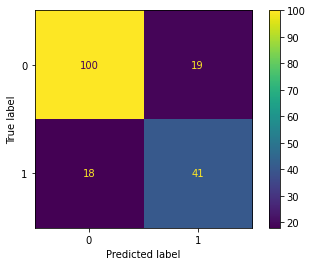

In [69]:
plot_confusion_matrix(model,X_test,y_test)

In [71]:
labels = ["Not sobrevivio", "Sobrevivio"]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       119
           1       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



# Acurracy de la matriz de confusion 

In [73]:
accuracy = (95 + 50) / (95 + 50 + 15 + 18)
accuracy

0.8146067415730337

# Precision

In [74]:
precision = 50 / (50 + 15)
precision

0.7692307692307693

# Recall

In [75]:
recall = 50 / (50 + 18)
recall

0.7352941176470589

# F1 Score

In [77]:
f1 = 2 * ((precision * recall) / (precision + recall))
f1

0.7518796992481205

# SKLearn Metrics

In [79]:
print("Acurracy: {} : {}".format(accuracy,accuracy_score(y_test,y_pred)))

Acurracy: 0.8146067415730337 : 0.7921348314606742


In [80]:
print("Precision: {} : {}".format(precision,precision_score(y_test,y_pred)))

Precision: 0.7692307692307693 : 0.6833333333333333


In [81]:
print("Recall: {} : {}".format(recall,recall_score(y_test,y_pred)))

Recall: 0.7352941176470589 : 0.6949152542372882


In [82]:
print("F1 Score: {} : {}".format(f1,f1_score(y_test,y_pred)))

F1 Score: 0.7518796992481205 : 0.6890756302521008


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       119
           1       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



# Cambiar el umbral (Threshold)

In [97]:
 y_pred = model.predict_proba(X_test)[:,1]


# CONCLUSIÓN


Como conclusión se deduce que Google Colab facilita aún el procesamiento de la información y el compartirla con tus colaboradores. Además, tienes a tu servicio la capacidad de cómputo de Google, por lo que, si estás utilizando un equipo con pocos recursos, esta es la herramienta ideal para desarrollar tus algoritmos.Así mismo lo visto en esta actividad fue de gran ayuda ya que vimos el cómo realizar una accuracy en la matriz de confusion, vimos es como sacar el precision,recall,f1 score y el cambio de umbral.